In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import seaborn as sns
import numpy as np

%matplotlib inline


plt.style.use('default')
sns.set(style="whitegrid")

In [2]:
filepath = '../data/events.csv'
trocafone_events = pd.read_csv(filepath, low_memory = False)
trocafone_events['timestamp'] = pd.to_datetime(trocafone_events['timestamp'])

In [3]:
searched_products = trocafone_events.loc[trocafone_events['event'] == 'searched products'][['timestamp','person','skus','search_term']].dropna(axis=0)
searched_products['search_term'] = searched_products['search_term'].str.lower()

In [4]:
marcas = {'Samsung' : 'samsung|sansung|sansumg|s3|s4|s5|s6|s7|s8|s9|a3|a5|a7|a8|a9|a10|j1|j2|j3|\
                        j4|j5|j7|j8|e5|e7|galaxy|note|prime|edge',
            'Apple' : 'iphone|apple|ipad|i phone|aple|iphome|4s|5s|6s|7s|8s',
            'Motorola' : 'moto|g4 plus|g5 plus',
              'LG' : 'lg|k8|k10|k 10|k4',
              'Asus' : 'asus|zonfone|zenfone|azus|assus',
              'Nokia' : 'nokia|lumia',
              'Lenovo' : 'lenovo',
              'Sony' : 'sony|xperia|x-peria',
              'Blackberry': 'blackberry',
              'Quantum' : 'quantum'
         }

for marca, values in marcas.items():
    searched_products.loc[searched_products['search_term'].str.contains(values)
        ,'searched_model'] = marca
    

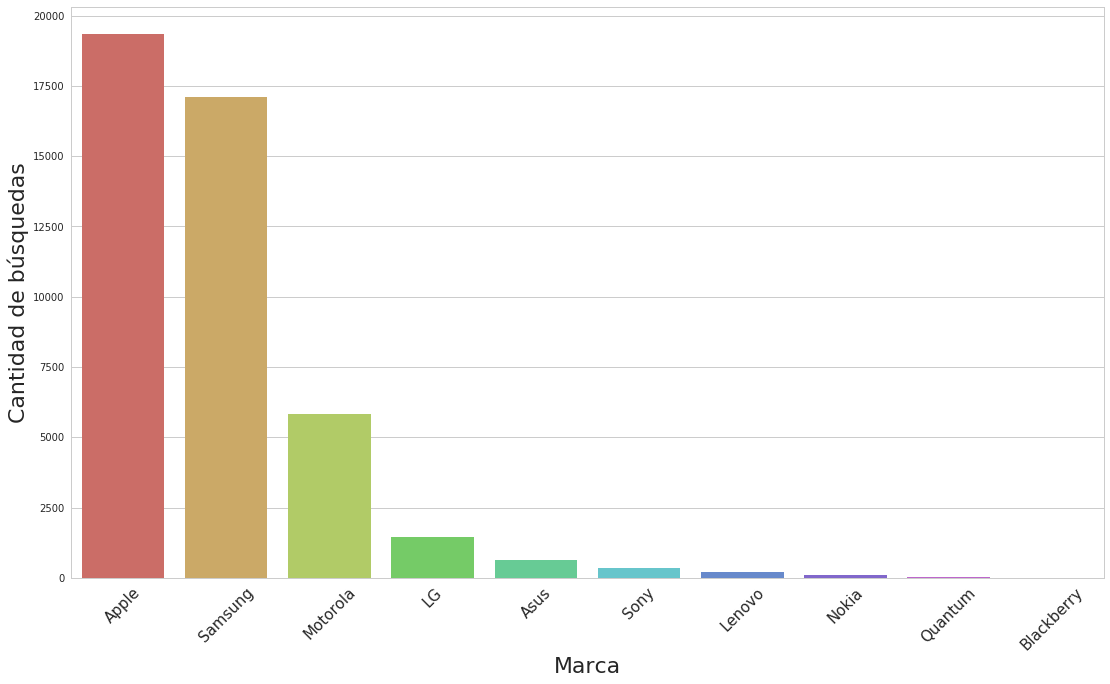

In [5]:
top_searched = searched_products.groupby('searched_model')['searched_model'].count().sort_values(ascending=False)
g = sns.barplot(x=top_searched.index, y=top_searched.values, orient="v", palette="hls")
#g.set_title("Top búsquedas según la marca", fontsize=15)
g.set_ylabel("Cantidad de búsquedas", fontsize=22)
g.set_xlabel("Marca", fontsize=22)
g.set_xticklabels(g.get_xticklabels(),rotation=45, fontdict={'fontsize': 15})

f = g.get_figure()
f.set_size_inches(18.5, 10.5, forward=True)

In [6]:
# Busquedas por persona
prod = searched_products.groupby('person')['searched_model'].value_counts()
prod = prod.unstack(fill_value=0)
prod.reset_index(inplace=True)

In [7]:
# Cantidad total de busquedas.
prod['sum'] = prod.sum(axis=1)

In [8]:
# Personas que buscaron solo Apple
prod['only_apple'] = (prod['Apple'] > 0) & (prod['sum'] == prod['Apple'])
# Personas que buscaron solo Samsung
prod['only_samsung'] = (prod['Samsung'] > 0) & (prod['sum'] == prod['Samsung'])
# Personas que buscaron apple y ademas samsung
prod['smg_and_apple'] = (prod['Apple'] > 0) & (prod['Samsung'] > 0)

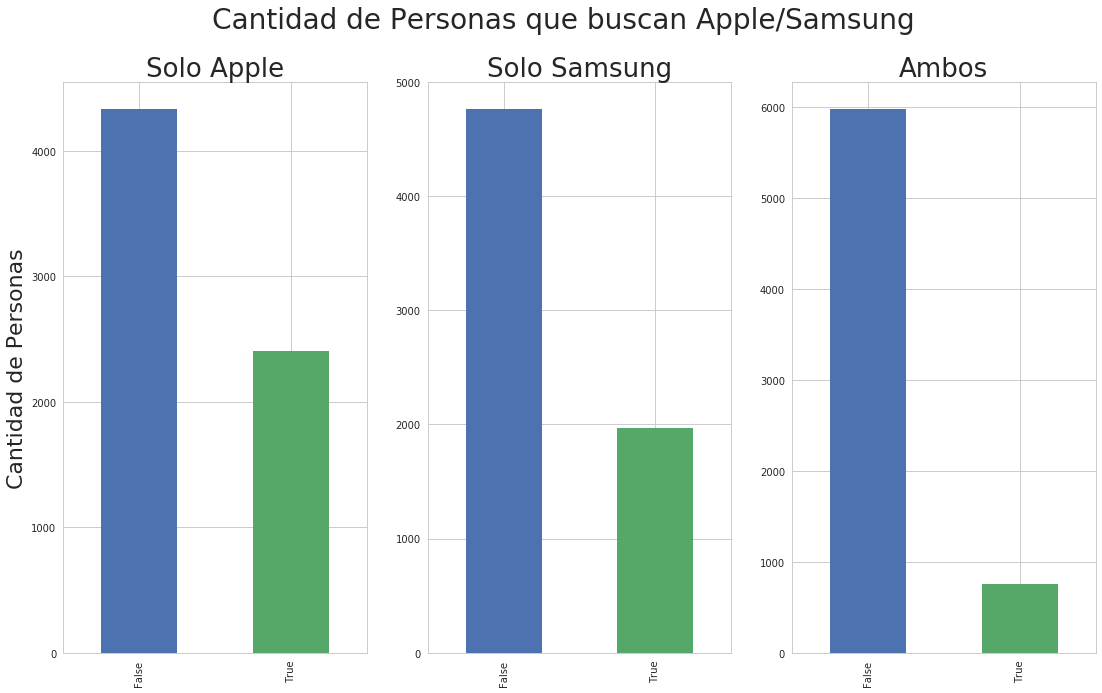

In [9]:
f = plt.figure()
f.suptitle('Cantidad de Personas que buscan Apple/Samsung', fontsize=28)

# Plot solo Apple
plt.subplot(1,3,1)
plt.title('Solo Apple', fontsize=26)
prod['only_apple'].value_counts().plot(kind='bar')
plt.ylabel('Cantidad de Personas', fontsize=22)

# Plot solo Samsung
plt.subplot(1, 3, 2)
prod['only_samsung'].value_counts().plot(kind='bar')
plt.title('Solo Samsung',  fontsize=26)

# Plot solo Ambos
plt.subplot(1,3,3)
plt.title('Ambos', fontsize=26)
prod['smg_and_apple'].value_counts().plot(kind='bar')

f.set_size_inches(18.5, 10.5, forward=True)
plt.show()

In [ ]:
# Plot
g = sns.regplot(x="Apple", y="Samsung", data=prod)
g.set_title("Checkout vs Conversion", fontsize=22)
g.set_xlabel("Checkout",fontsize=18)
g.set_ylabel("Conversion", fontsize=18)
# Limites
g.set_xlim(0, 100)
g.set_ylim(0, 100)
f = g.get_figure()

f.set_size_inches(18.5, 10.5, forward=True)

In [ ]:
prod.plot(kind='scatter', x='sum', y='Apple')

In [ ]:
f = plt.figure()

ax = prod.plot(kind="scatter", x='sum',y='Apple', color="b", label="Apple vs Total")
prod.plot(kind="scatter", x="sum",y="Samsung", color="r", label="Samsung vs Total", ax=ax)
#df.plot( x="x",y="c", color="g", label="c vs. x", ax=ax)
ax.set_xlabel("Total de Busquedas por persona")
ax.set_ylabel('Busquedas por Marca')

f.set_size_inches(18, 10, forward=True)